<h1 align=center>栅格数据清洗2：常用数据清洗方法</h1>
----
* 作者：吴立宗
* 日期：2016年7月5日
* 目标：批量开展数据处理
 * 格式转换
 * 投影转换
 * 裁切
 * 波段组合
 * 数据合并

## 1.格式转换
* 建议使用批处理模式
* 建议使用的格式包括:
 * Geotif
 * HDF
 * NetCDF
 * ......
* 不建议使用的格式：
 * Arcinfo的各种grid格式
 * 文本格式
 * 不含投影信息的图像格式，如bmp，jpg等

### 1）专业软件(略)

### 2）gdal_translate

* 支持的格式:http://www.gdal.org/formats_list.html

In [1]:
import subprocess
filename='C:/WestCode/Jupyter/GeoData/Day_4/data/raster/s_temp0cm'

In [2]:
geotif_file='c:/temp/china_soil_temp_0cm.tif'
log=subprocess.check_output("gdal_translate " + filename +' '+geotif_file)
log

b'Input file size is 2541, 2044\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n'

### 3)批量格式转化

* 批处理方式
* 结合python脚本方式

## 2.投影转换

### 2.1专业软件

### 2.2 gdal_warp命令

In [8]:
import subprocess
file_3857='c:/temp/file_3857.tif'
cmd_str="gdalwarp -t_srs epsg:3857 -tr 2000 2000 -r bilinear -overwrite %s %s"%(geotif_file,file_3857)
log=subprocess.check_output(cmd_str)
log

b'Creating output file that is 4020P x 2835L.\r\nProcessing input file c:/temp/china_soil_temp_0cm.tif.\r\nUsing internal nodata values (e.g. -3.40282e+38) for image c:/temp/china_soil_temp_0cm.tif.\r\nCopying nodata values from source c:/temp/china_soil_temp_0cm.tif to destination c:/temp/file_3857.tif.\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n'

### 2.3批量投影转换

* 批处理模式
* 结合python脚本模式

### 3.图像裁切

In [62]:
import geopandas as gpd


In [66]:
shapefile='data/china_boundary_province.shp'
df=gpd.read_file(shapefile,encoding='gbk')
df.head()

,CLASID,CLASID92,CLASID_XM,ELEMID,ENTIID,NAME,OBJECTID,Shape_Area,Shape_Leng,geometry
0,630100,460000,1160301000,None,1CHN460000000,海南省,1,0.001854,0.156253,"POLYGON ((112.0391921999012 3.834796428673201,..."
1,630100,460000,1160301000,None,1CHN460000000,海南省,2,0.001574,0.142934,"POLYGON ((112.2505187987997 3.863619565713237,..."
2,630100,460000,1160301000,None,1CHN460000000,海南省,3,0.001124,0.120940,"POLYGON ((112.2637710571373 3.939680814520955,..."
3,630100,460000,1160301000,None,1CHN460000000,海南省,4,0.002346,0.180429,"POLYGON ((112.944808960001 5.001026630564752, ..."
4,630100,460000,1160301000,None,1CHN460000000,海南省,5,0.002047,0.168232,"POLYGON ((112.5897674560664 5.076359272046659,..."


In [68]:
prov_list=[u'云南省',u'四川省']
df_new=df[df['NAME']==u'云南省']
df_new

,CLASID,CLASID92,CLASID_XM,ELEMID,ENTIID,NAME,OBJECTID,Shape_Area,Shape_Leng,geometry
577,630100,None,1160301000,None,1CHN530000000,云南省,866,34.276908,58.969367,"POLYGON ((99.11814873462282 29.19243189650877,..."
829,630100,None,1160301000,None,1CHN530000000,云南省,798,0.000000,0.000005,"POLYGON ((105.2644582603499 27.99999887530169,..."


In [76]:
x_min,y_min,x_max,y_max=df_new.geometry.total_bounds
x_min,y_min,x_max,y_max

(97.529113821655471,
 21.144353624352789,
 106.19421386692949,
 29.251118565667699)

In [81]:
crs="+ellps=krass +lat_0=0 +lat_1=25 +lat_2=47 +lon_0=105 +no_defs +proj=aea +units=m +x_0=0 +y_0=0"
df_albers=df_new.to_crs(crs)
x_min,y_min,x_max,y_max=df_albers.geometry.total_bounds
bounds = '%f %f %f %f'%(x_min,y_min,x_max,y_max)
bounds

'-762179.307255 2195297.160423 122053.077698 3104525.896909'

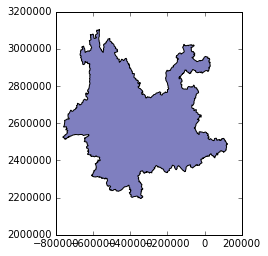

In [94]:
%matplotlib inline
df_albers.plot()

In [97]:
mask_file='c:/temp/mask.shp'
df_albers.to_file(mask_file,encoding='gbk')

In [99]:
file_masked='c:/temp/yunnan_masked.tif'
cmd_str="gdalwarp -cutline %s %s %s"%(mask_file,geotif_file,file_yunnan)
log=subprocess.check_output(cmd_str)
log

b'Processing input file c:/temp/china_soil_temp_0cm.tif.\r\nUsing internal nodata values (e.g. -3.40282e+38) for image c:/temp/china_soil_temp_0cm.tif.\r\nCopying nodata values from source c:/temp/china_soil_temp_0cm.tif to destination c:/temp/yunnan.tif.\r\n0...10...20...30...40...50...60...70...80...90...100 - done.\r\n'

## 4. 波段组合

In [112]:
import os
filepath='C:/WestCode/Jupyter/GeoData/Day_4/data/Landsat/p142r029_7k20020628_z45_GLCF/'
file_5='p142r029_7t20020628_z45_nn50.tif'
file_4='p142r029_7t20020628_z45_nn40.tif'
file_3='p142r029_7t20020628_z45_nn30.tif'
band_5=os.path.join(filepath,file_5)
band_4=os.path.join(filepath,file_4)
band_3=os.path.join(filepath,file_3)


In [117]:
rgb_file='c:/temp/rgb_file.tif'
cmd_str="gdal_merge -separate -o %s %s %s %s"%(rgb_file,band_5,band_4,band_3)
print(cmd_str)
#log=subprocess.check_output(cmd_str)
#log

gdal_merge -separate -o c:/temp/rgb_file.tif C:/WestCode/Jupyter/GeoData/Day_4/data/Landsat/p142r029_7k20020628_z45_GLCF/p142r029_7t20020628_z45_nn50.tif C:/WestCode/Jupyter/GeoData/Day_4/data/Landsat/p142r029_7k20020628_z45_GLCF/p142r029_7t20020628_z45_nn40.tif C:/WestCode/Jupyter/GeoData/Day_4/data/Landsat/p142r029_7k20020628_z45_GLCF/p142r029_7t20020628_z45_nn30.tif


* 请在OSGEO4w_shell运行
![](img/landsat_RGB.PNG)

## 5.数据合并

* 使用同样的命令，不加-separate 参数